In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1912046

Specify each path

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 4

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 42

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(24, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 672)               0         
                                                                 
 dense (Dense)               (None, 24)                16152     
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 16,446
Trainable params: 16,446
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 4s - loss: 8968582.0000 - accuracy: 0.2969
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 1s 57ms/step - loss: 4227675.0000 - accuracy: 0.4332 - val_loss: 1231593.8750 - val_accuracy: 0.6753
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 1952785.7500 - accuracy: 0.5625
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 17ms/step - loss: 9217431.0000 - accuracy: 0.5689 - val_loss: 448124.1562 - val_accuracy: 0.7565
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 433583.9375 - accuracy: 0.5547
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 15ms/step - loss: 6811856.5000 - accuracy: 0.6145 - val_loss: 412828.5312 - val_accuracy: 0.8214
Epoch 4/1000
1/8 [==>....

7/8 [=========================>....] - ETA: 0s - loss: 356301.5625 - accuracy: 0.6540
Epoch 26: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 51ms/step - loss: 352621.7812 - accuracy: 0.6493 - val_loss: 85853.8281 - val_accuracy: 0.7792
Epoch 27/1000
7/8 [=========================>....] - ETA: 0s - loss: 185158.2812 - accuracy: 0.6864
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 31ms/step - loss: 180758.2031 - accuracy: 0.6840 - val_loss: 80292.5625 - val_accuracy: 0.7857
Epoch 28/1000
8/8 [==============================] - ETA: 0s - loss: 263156.7500 - accuracy: 0.6710
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 21ms/step - loss: 263156.7500 - accuracy: 0.6710 - val_loss: 80616.0859 - val_accuracy: 0.7597
Epoch 29/1000
1/8 [==>....................

8/8 [==============================] - 0s 22ms/step - loss: 48642.0859 - accuracy: 0.6862 - val_loss: 56268.2227 - val_accuracy: 0.7825
Epoch 52/1000
8/8 [==============================] - ETA: 0s - loss: 40079.4414 - accuracy: 0.6569
Epoch 52: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 40079.4414 - accuracy: 0.6569 - val_loss: 44548.9883 - val_accuracy: 0.7857
Epoch 53/1000
7/8 [=========================>....] - ETA: 0s - loss: 58315.7773 - accuracy: 0.6429
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 26ms/step - loss: 56732.8516 - accuracy: 0.6428 - val_loss: 35594.2500 - val_accuracy: 0.7825
Epoch 54/1000
1/8 [==>...........................] - ETA: 0s - loss: 57201.0742 - accuracy: 0.5938
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [=============================

7/8 [=========================>....] - ETA: 0s - loss: 78995.0000 - accuracy: 0.6049
Epoch 77: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 23ms/step - loss: 76850.7500 - accuracy: 0.6004 - val_loss: 41961.6211 - val_accuracy: 0.7695
Epoch 78/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.6875
Epoch 78: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 20ms/step - loss: 43603.9883 - accuracy: 0.6482 - val_loss: 36878.7773 - val_accuracy: 0.7695
Epoch 79/1000
1/8 [==>...........................] - ETA: 0s - loss: 5703.0879 - accuracy: 0.5938
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
8/8 [==============================] - 0s 21ms/step - loss: 36949.6797 - accuracy: 0.6145 - val_loss: 32939.3125 - val_accuracy: 0.7695
Epoch 80/1000
1/8 [==>...........................] - 

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.32203755 0.35089973 0.11353717 0.21352556]
1


# 混同行列

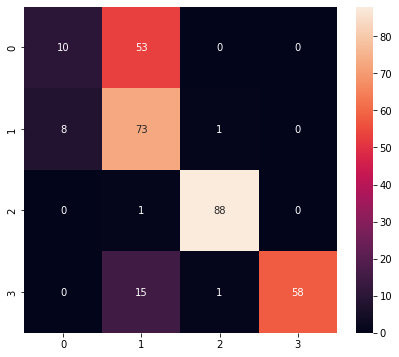

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.16      0.25        63
           1       0.51      0.89      0.65        82
           2       0.98      0.99      0.98        89
           3       1.00      0.78      0.88        74

    accuracy                           0.74       308
   macro avg       0.76      0.71      0.69       308
weighted avg       0.77      0.74      0.72       308



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [17]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [18]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [19]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp78akcr46\assets


19424

# 推論テスト

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 672]), 'shape_signature': array([ -1, 672]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.99 ms


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.32203755 0.35089976 0.11353718 0.21352556]
1
